## Observations and Insights 

In [41]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../Resources/data_Mouse_metadata.csv"
study_results_path = "../Resources/data_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [42]:
# Checking the number of mice. Using .describe() to obtain unique mouse id count
combined_data["Mouse ID"].describe()

count     1893
unique     249
top       g989
freq        13
Name: Mouse ID, dtype: object

In [43]:
# creat a dataframe for duplicated data. Using .loc and .duplicated on "Mouse Id" to go through : all the rows
duplicated_data = combined_data.loc[combined_data.duplicated("Mouse ID"), :]
duplicated_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [44]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. From duplicated data above.
duplicated_data.loc[:,["Mouse ID", "Timepoint"]]

,Mouse ID,Timepoint
1,k403,5
2,k403,10
3,k403,15
4,k403,20
5,k403,25
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [45]:
# Optional: Get all the data for the duplicate mouse ID.
duplicated_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [46]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
# Using combined_data tp drop_duplicates since the duplicated_data does not account for 9 non-duplicate mouse id's
clean_data = combined_data.drop_duplicates("Mouse ID", keep="last")
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [47]:
# Checking the number of mice in the clean DataFrame. Confirm Mouse Id count is 249
clean_data["Mouse ID"].count()

249

## Summary Statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# create groupby. "Drug Regimen" 
grouped_drug_regimen = clean_data.groupby(["Drug Regimen"])

# Create DataFrame using groupby. "Drug Regimen" and calling on '"Tumor Volume (mm3)" for each mean, median, var, std and sem for 
# for each Drug Regimen
drug_summary_statistics_df = pd.DataFrame({"Tumor Volume (mm3) Mean": grouped_drug_regimen["Tumor Volume (mm3)"].mean(), 
                                       "Tumor Volume (mm3) Median": grouped_drug_regimen["Tumor Volume (mm3)"].median(),
                                       "Tumor Volume (mm3) Variance": grouped_drug_regimen["Tumor Volume (mm3)"].var(),
                                       "Tumor Volume (mm3) STD": grouped_drug_regimen["Tumor Volume (mm3)"].std(),
                                       "Tumor Volume (mm3) SEM": grouped_drug_regimen["Tumor Volume (mm3)"].sem()})
drug_summary_statistics_df.head()





,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) STD,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417


In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

# Using grouped_drug_regimen used .agg (aggregation method) to call on "Tumor Volume (mm3)" and listing fuction that we want to aggregate
aggregation_method = grouped_drug_regimen.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
aggregation_method                                              

Tumor Volume (mm3)                                            
                           mean     median         var        std       sem
Drug Regimen                                                               
Capomulin             36.667568  38.125164   32.663378   5.715188  1.143038
Ceftamin              57.753977  59.851956   69.982735   8.365568  1.673114
Infubinol             58.178246  60.165180   74.010875   8.602957  1.720591
Ketapril              62.806191  64.487812   98.921330   9.945920  1.989184
Naftisol              61.205757  63.283288  106.029927  10.297083  2.059417
Placebo               60.508414  62.030594   78.759797   8.874672  1.774934
Propriva              56.736964  55.841410   69.349002   8.327605  1.665521
Ramicane              36.191390  36.561652   32.166354   5.671539  1.134308
Stelasyn              61.001707  62.192350   90.331586   9.504293  1.940056
Zoniferol             59.181258  61.840058   76.862027   8.767099  1.753420

## Bar and Pie Charts

<IPython.core.display.Javascript object>


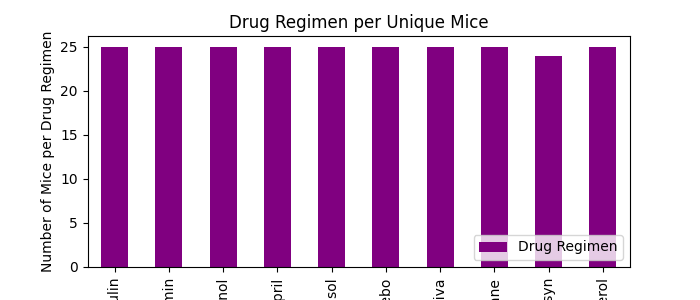

In [50]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Get drug variable with groupby on "Drug Regimen" 
drugs = clean_data.groupby("Drug Regimen")

# Get mice count per drug variable and DataFrame for plot 
mice_per_drug = pd.DataFrame(drugs["Drug Regimen"].count())

# Create plot with pandas
mice_per_drug.plot(kind="bar", facecolor="purple", figsize=(7,3))



# Assign labels to bar plot
plt.title("Drug Regimen per Unique Mice")
plt.xlabel("Drug Regimen by Brand")
plt.ylabel("Number of Mice per Drug Regimen")


# Call legend and assign location 
plt.legend(loc="lower right")

plt.show()


<IPython.core.display.Javascript object>


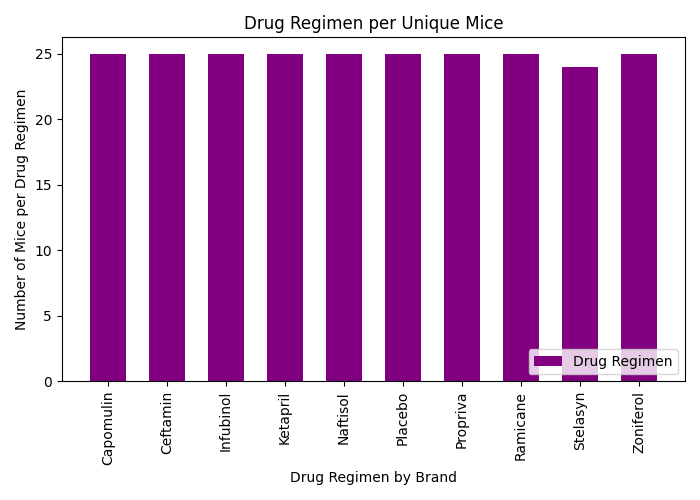

In [51]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.aka#numpy

# Get drug variable with groupby on "Drug Regimen" 
drugs_group = clean_data.groupby("Drug Regimen")

# Get mice count per drug variable and DataFrame for plot
mice_per_drug = pd.DataFrame(drugs_group["Drug Regimen"].count())

x_axis = np.arange(len(mice_per_drug))

tick_locations = [value for value in x_axis]

plt.figure(figsize=(7, 5))
plt.bar(x_axis, mice_per_drug["Drug Regimen"], color="purple", align="center", width=.6)
plt.xticks(tick_locations, list(mice_per_drug.index), rotation="vertical")
           
    
# Assign labels to bar plot
plt.title("Drug Regimen per Unique Mice")
plt.xlabel("Drug Regimen by Brand")
plt.ylabel("Number of Mice per Drug Regimen")


# Call legend and assign location 
legend_title = ["Drug Regimen"]
plt.legend(legend_title, loc="lower right")
plt.tight_layout()


<IPython.core.display.Javascript object>


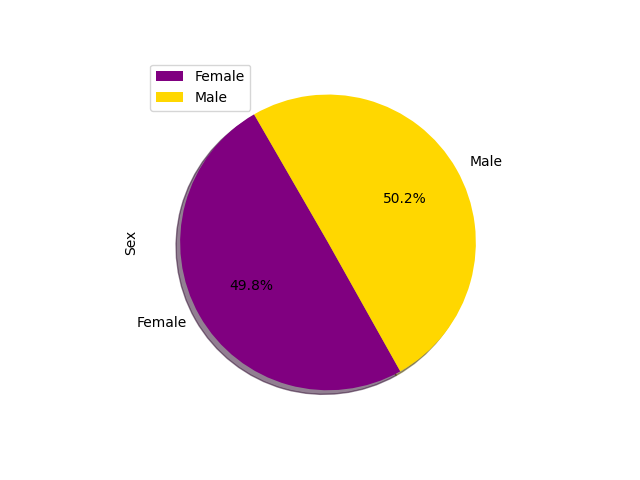

array([<AxesSubplot:ylabel='Sex'>], dtype=object)

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create .groupby on "Sex"
genders = clean_data.groupby(["Sex"])

# Create DataFrame with gender groupby to and get gender count
male_female_df = pd.DataFrame(genders["Sex"].count())

# Create pie chart
male_female_df.plot(kind="pie", subplots=True, colors=["purple", "gold"], autopct="%1.1f%%", shadow="True", startangle=120, legend=True)

<IPython.core.display.Javascript object>


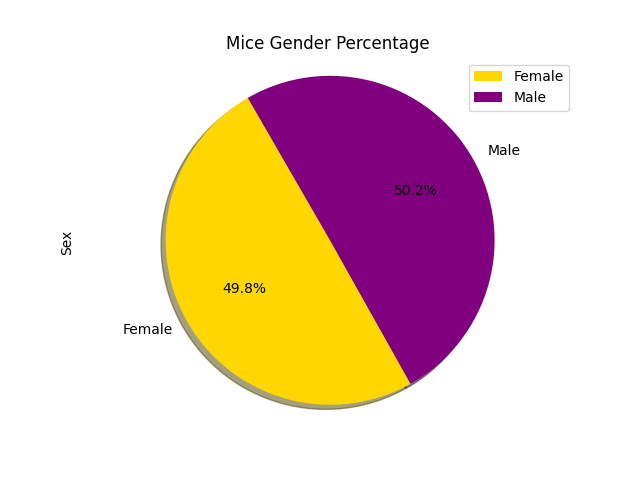

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create .groupby on "Sex"
genders = clean_data.groupby(["Sex"])

# Create DataFrame with gender groupby to and get gender count
male_female_df = pd.DataFrame(genders["Sex"].count())

male_female_list = list(male_female_df.index.values)
gender_count = male_female_df["Sex"]
labels = ["Male","Female"]
colors = ["gold", "purple"]
explode = (0.3, 0)

# plot pie
plt.figure()
plt.pie(gender_count, labels=male_female_list , colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)

# Assign labels
plt.title("Mice Gender Percentage")
plt.axis("equal")
plt.ylabel("Sex")

plt.legend(loc="best")
plt.show()


## Quartiles, Outliers and Boxplots

In [73]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

tumor_volume_cric = clean_data.loc[clean_data["Tumor Volume (mm3)"] == ["Capomulin"] & 
                                   "Ramicane" & "Infubinol" & "Ceftamin"]]
tumor_volume_cric

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


TypeError: unsupported operand type(s) for &: 'str' and 'str'

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
